# DTOcean Tidal Hydrodynamics Database Test

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [4]:
import numpy as np

In [5]:
from dtocean_core import start_logging
from dtocean_core.core import Core
from dtocean_core.menu import DataMenu, ModuleMenu, ProjectMenu
from dtocean_core.pipeline import Tree

In [6]:
def html_list(x):
    message = "<ul>"
    for name in x:
        message += "<li>{}</li>".format(name)
    message += "</ul>"
    return message
def html_dict(x):
    message = "<ul>"
    for name, status in x.iteritems():
        message += "<li>{}: <b>{}</b></li>".format(name, status)
    message += "</ul>"
    return message

In [7]:
# Bring up the logger
start_logging()

2016-09-27 12:32:23,867 - INFO - dtocean_core - Begin logging for dtocean_core.


## Create the core, menus and pipeline tree

The core object carrys all the system information and is operated on by the other classes

In [8]:
new_core = Core()
data_menu = DataMenu()
project_menu = ProjectMenu()
module_menu = ModuleMenu()
pipe_tree = Tree()

## Create a new project

In [9]:
project_title = "DTOcean"  
new_project = project_menu.new_project(new_core, project_title)

2016-09-27 12:32:29,334 - INFO - aneris.entity.simulation - Created new Simulation with title "Default"
2016-09-27 12:32:29,335 - INFO - aneris.control.simulation - Datastate with level "initial" stored
2016-09-27 12:32:29,336 - INFO - aneris.control.pipeline - New Hub created for interface ProjectInterface.


## Connect a database

In [10]:
data_menu.select_database(new_project, "local")

## Set the device type

In [11]:
options_branch = pipe_tree.get_branch(new_core, new_project, "System Type Selection")
variable_id = "device.system_type"
my_var = options_branch.get_input_variable(new_core, new_project, variable_id)
my_var.set_raw_interface(new_core, "Tidal Fixed")
my_var.read(new_core, new_project)

2016-09-27 12:32:29,381 - INFO - aneris.control.data - New "device.system_type" data stored with index WE3PBO
2016-09-27 12:32:29,382 - INFO - aneris.control.simulation - Datastate stored


## Initiate the pipeline
This step will be important when the database is incorporated into the system as it will effect the operation of the pipeline.

In [12]:
project_menu.initiate_pipeline(new_core, new_project)

2016-09-27 12:32:29,401 - INFO - aneris.control.simulation - Datastate with level "system type selection start" stored
2016-09-27 12:32:29,410 - INFO - aneris.control.data - New "hidden.pipeline_active" data stored with index SDL30T
2016-09-27 12:32:29,411 - INFO - aneris.control.simulation - Datastate with level "system type selection output" stored
2016-09-27 12:32:29,413 - INFO - aneris.control.pipeline - New Pipeline created for interface ModuleInterface.
2016-09-27 12:32:29,414 - INFO - aneris.control.pipeline - New Hub created for interface ThemeInterface.
2016-09-27 12:32:29,936 - INFO - aneris.control.data - New "hidden.available_sites" data stored with index JRGBX9
2016-09-27 12:32:29,937 - INFO - aneris.control.data - New "hidden.available_systems" data stored with index P5SHLL
2016-09-27 12:32:29,937 - INFO - aneris.control.data - New "hidden.lease_boundaries" data stored with index PUWLPT
2016-09-27 12:32:29,937 - INFO - aneris.control.data - New "hidden.site_boundaries" da

## Retrieve the available site and technology options from the DB

In [13]:
project_menu.initiate_options(new_core, new_project)

2016-09-27 12:32:29,943 - INFO - aneris.control.simulation - Datastate with level "site and system options start" stored
2016-09-27 12:32:29,953 - INFO - aneris.control.data - New "device.available_names" data stored with index I7A0D7
2016-09-27 12:32:29,954 - INFO - aneris.control.data - New "site.available_names" data stored with index HDKPMH
2016-09-27 12:32:29,956 - INFO - aneris.control.data - New "hidden.lease_selected" data stored with index UXLCEE
2016-09-27 12:32:29,956 - INFO - aneris.control.simulation - Datastate with level "site and system options output" stored


In [14]:
options_branch = pipe_tree.get_branch(new_core, new_project, 'Site and System Options')
options_branch.read_auto(new_core, new_project)
input_status = options_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Check available device names

In [15]:
my_var = options_branch.get_output_variable(new_core, new_project, "device.available_names")
site_list = my_var.get_value(new_core, new_project)
msg = html_list(site_list)
HTML(msg)

## Select a device

In [16]:
filter_branch = pipe_tree.get_branch(new_core, new_project, 'Database Filtering Interface')
new_var = filter_branch.get_input_variable(new_core, new_project,
                                            "device.selected_name")
new_var.set_raw_interface(new_core, "Andritz HS1000")
new_var.read(new_core, new_project)

2016-09-27 12:32:30,026 - INFO - aneris.control.data - New "device.selected_name" data stored with index 4B597L
2016-09-27 12:32:30,028 - INFO - aneris.control.simulation - Datastate stored


In [17]:
input_status = filter_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Check the available site names

In [18]:
available_locations = options_branch.get_output_variable(new_core, new_project,
                                                         "site.available_names")
message = html_list(available_locations.get_value(new_core, new_project))
message = "<h3>Available Locations</h3>" + message
HTML(message)

## Add the site location

In [19]:
new_var = filter_branch.get_input_variable(new_core, new_project,
                                           "site.selected_name")
new_var.set_raw_interface(new_core, "Second Site")
new_var.read(new_core, new_project)

2016-09-27 12:32:30,075 - INFO - aneris.control.data - New "site.selected_name" data stored with index 1E5QQZ
2016-09-27 12:32:30,075 - INFO - aneris.control.simulation - Datastate stored


In [20]:
input_status = filter_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Collect the bathymetric data
The lease area polygon may be editied following this step.

In [21]:
project_menu.initiate_bathymetry(new_core, new_project)

2016-09-27 12:32:30,154 - INFO - aneris.control.simulation - Datastate with level "lease area selection start" stored
2016-09-27 12:32:30,161 - INFO - aneris.control.data - New "site.lease_boundary" data stored with index PF1LCL
2016-09-27 12:32:30,161 - INFO - aneris.control.data - New "site.projection" data stored with index FRBIF1
2016-09-27 12:32:30,164 - INFO - aneris.control.data - New "hidden.lease_selected" data stored with index 88UOPM
2016-09-27 12:32:30,164 - INFO - aneris.control.simulation - Datastate with level "lease area selection output" stored


## Filter the database

In [22]:
project_menu.initiate_filter(new_core, new_project)

2016-09-27 12:32:30,177 - INFO - aneris.control.simulation - Datastate with level "database filtering interface start" stored
2016-09-27 12:32:30,367 - INFO - aneris.control.data - New "hidden.site_filtered" data stored with index FY5P3S
2016-09-27 12:32:30,368 - INFO - aneris.control.data - New "hidden.device_filtered" data stored with index 3AFQCK
2016-09-27 12:32:30,368 - INFO - aneris.control.simulation - Datastate with level "database filtering interface output" stored


## Discover available modules

In [23]:
names = module_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

## Activate a module

Note that the order of activation is important and that we can't deactivate yet!

In [24]:
module_name = 'Hydrodynamics'
module_menu.activate(new_core, new_project, module_name)
hydro_branch = pipe_tree.get_branch(new_core, new_project, 'Hydrodynamics')

## Check the status of the module inputs

In [25]:
input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Initiate the dataflow
This indicates that the filtering and module / theme selections are complete

In [26]:
project_menu.initiate_dataflow(new_core, new_project)

2016-09-27 12:32:30,450 - INFO - aneris.control.data - New "hidden.dataflow_active" data stored with index C8FOEV
2016-09-27 12:32:30,451 - INFO - aneris.control.simulation - Datastate stored
2016-09-27 12:32:30,464 - INFO - aneris.control.simulation - Datastate with level "modules initial" stored


## Move the system to the post-filter state and ready the system

In [27]:
new_core.inspect_level(new_project, "modules initial")
new_core.reset_level(new_project, preserve_level=True)

2016-09-27 12:32:30,473 - INFO - dtocean_core.core - Inspecting level modules initial
2016-09-27 12:32:30,487 - INFO - dtocean_core.core - Inspecting level modules initial
2016-09-27 12:32:30,487 - INFO - dtocean_core.core - Resetting to level modules initial


## Get data using DTOcean DB

Using the auto_connect method on a branch, we can pull available variables from the database

In [28]:
hydro_branch.read_auto(new_core, new_project)
input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

2016-09-27 12:32:33,217 - INFO - aneris.control.data - New "device.cut_in_velocity" data stored with index 1P1AKQ
2016-09-27 12:32:33,219 - INFO - aneris.control.data - New "device.bidirection" data stored with index C2PNIP
2016-09-27 12:32:33,232 - INFO - aneris.control.data - New "farm.tidal_series" data stored with index ZDY8PA
2016-09-27 12:32:33,233 - INFO - aneris.control.data - New "device.installation_depth_max" data stored with index HPB7RE
2016-09-27 12:32:33,233 - INFO - aneris.control.data - New "device.coordinate_system" data stored with index L2ML35
2016-09-27 12:32:33,234 - INFO - aneris.control.data - New "device.turbine_diameter" data stored with index 5OYHJG
2016-09-27 12:32:33,236 - INFO - aneris.control.data - New "device.minimum_distance_x" data stored with index 4SHC8X
2016-09-27 12:32:33,236 - INFO - aneris.control.data - New "device.minimum_distance_y" data stored with index G7QA97
2016-09-27 12:32:33,236 - INFO - aneris.control.data - New "device.installation_d

C:\Anaconda\envs\integration\lib\site-packages\sqlalchemy\dialects\postgresql\base.py:2499: SAWarning: Did not recognize type 'point' of column 'farm_origin'
  (attype, name))
C:\Anaconda\envs\integration\lib\site-packages\sqlalchemy\dialects\postgresql\base.py:2499: SAWarning: Did not recognize type 'polygon' of column 'deployment_area'
  (attype, name))


## Auto plot a variable 

In [29]:
new_var = hydro_branch.get_input_variable(new_core,
                                          new_project,
                                          'device.turbine_performance')

True


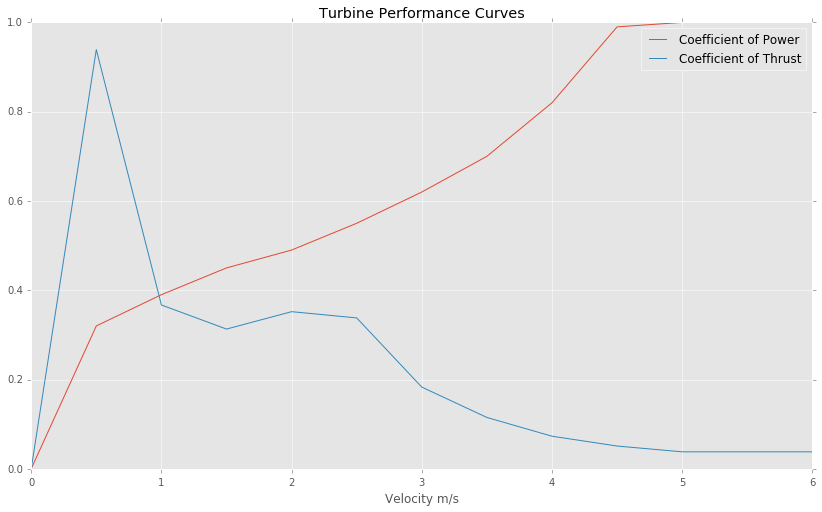

In [30]:
new_var.plot(new_core, new_project)

## Look for other available plots

In [31]:
plots = new_var.get_available_plots(new_core, new_project)
msg = html_list(plots)
HTML(msg)

## Plot a specific plot

True


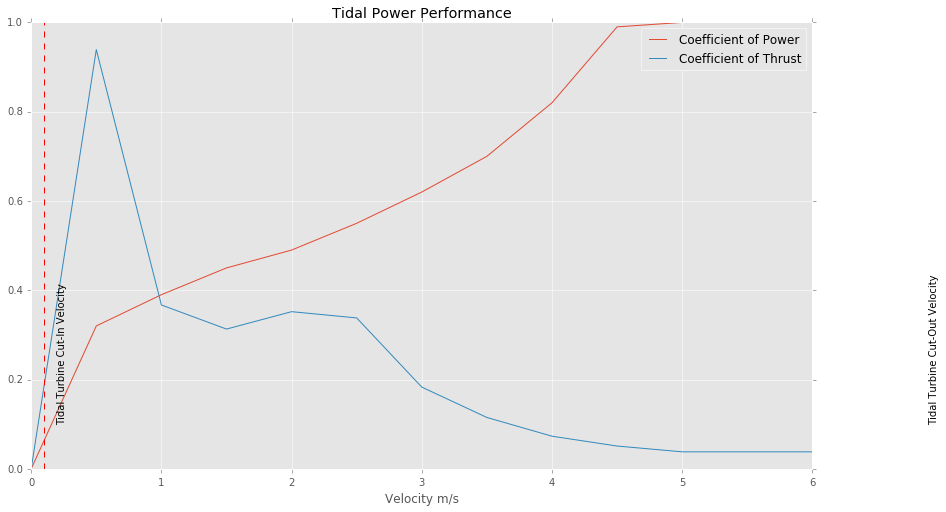

In [32]:
new_var.plot(new_core, new_project, 'Tidal Power Performance')

## Check if the module can be executed

In [33]:
can_execute = module_menu.is_executable(new_core, new_project, module_name)
display(can_execute)

False

In [34]:
input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Execute the current module

The "current" module refers to the next module to be executed in the chain (pipeline) of modules. This command will only execute that module and another will be used for executing all of the modules at once.

Note, any data supplied by the module will be automatically copied into the active data state.

In [35]:
module_menu.execute_current(new_core, new_project)

RuntimeError: Not all inputs for module Hydrodynamics or theme(s)  have been satisfied

## Examine the results

Currently, there is no robustness built into the core, so the assumption is that the module executed successfully. This will have to be improved towards deployment of the final software.

Let's check the number of devices and annual output of the farm, using just information in the data object.

In [ ]:
n_devices = new_core.get_data_value(new_project, "farm.number_of_devices")
meta = new_core.get_metadata("farm.number_of_devices")
name = meta.title
message_one = "<p><b>{}:</b> {}</p>".format(name, n_devices)

farm_annual_energy = new_core.get_data_value(new_project, "farm.annual_energy")
meta = new_core.get_metadata("farm.annual_energy")
name = meta.title
value = farm_annual_energy
units = meta.units[0]
message_two = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

HTML(message_one + message_two)

## Plotting some graphs

By having data objects with set formats it should be possible to create automated plot generation. However, some plots may be too complex and some special cases may need defined.

In [ ]:
mean_power_per_dev_value = new_core.get_data_value(new_project, 
                                                      "farm.mean_power_per_device")
meta = new_core.get_metadata("farm.mean_power_per_device")

chart_values = np.array(mean_power_per_dev_value.values())

In [ ]:
plt.bar(range(len(mean_power_per_dev_value)),
        chart_values,
        align='center')
            
plt.xticks(range(len(mean_power_per_dev_value)),
          mean_power_per_dev_value.keys())
plt.title(meta.title)

plt.ylabel(meta.units[0])

plt.tight_layout()
# plt.savefig('annual_power_per_device.png')
plt.show()

## Plotting the Layout

This may require such a special case. It is not clear is a new data type is required or just special plots associated to variable IDs.

In [ ]:
layout_value = new_core.get_data_value(new_project, "farm.layout")
layout_meta = new_core.get_metadata("farm.layout")

In [ ]:
x = []
y = []

for coords in layout_value.itervalues():
    
    x.append(coords.x)
    y.append(coords.y)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1, axisbg='lightskyblue')
ax1.plot(x,y,'k+', mew=2, markersize=10)
plt.title(layout_meta.title)
plt.axis('equal')
plt.show()